In [1]:
library(tidyverse) # install.packages("tidyverse")
library(patchwork) # install.packages("patchwork")

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 图形属性
- 我们在图中画一个点，那么这个点就有（形状，大小，颜色，位置，透明度）等属性， 这些属性就是**图形属性**（有时也称之为图形元素或者视觉元素）
![image.png](image/common-aesthetics.png)
- 点和线常用的图形属性

geom |	x	|y	|size	|color	|shape	|linetype	|alpha	|fill	|group
----|----|----|----|----|----|----|----|----|----
point	|√	|√	|√	|√	|√	|√	|√	|√	|√
line	|√	|√	|√	|√	|	|√	|√	|	|√

## 宏包`ggplot2`
- `ggplot2`有一套优雅的绘图语法，包名中“`gg`”是`grammar of graphics`的简称。
- 数值到图形属性的映射过程
  - ![image.png](image/mapping.png)
- 我们希望用**点的大小**代表这个位置上的某个**变量**（比如，降雨量，产品销量等等），那么变量的数值越小，点的半径就小一点，数值越大，点就可以大一点；或者变量的数值大，点的颜色就深一点，数值小，点的颜色就浅一点。即，数值到图形属性的**映射**过程。
- **映射**是一个数学词汇，可以理解为**一一对应**。
### 1 `ggplot()`函数包括9个部件
- 数据 (data) （数据框）
- 映射 (mapping)
- 几何形状 (geom)
- 统计变换 (stats)
- 标度 (scale)
- 坐标系 (coord)
- 分面 (facet)
- 主题 (theme)
- 存储和输出 (output)

其中**数据、映射、几何形状**这三个是必需的。
语法模版如下

In [2]:
ggplot(data = <DATA>) + 
   <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: 意外的'<'
1: ggplot(data = <
                  ^


此外，图形中还可能包含数据的统计变换(statistical transformation，缩写stats)，最后绘制在某个特定的坐标系(coordinate system，缩写coord)中，而分面(facet)则可以用来生成数据不同子集的图形。

In [7]:
library(tidyverse)
library(janitor)
library(palmerpenguins)

penguins <- penguins %>% 
  janitor::clean_names() %>% 
  drop_na()

In [8]:
penguins %>% 
  head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [10]:
penguins %>% 
  select(species, sex, bill_length_mm, bill_depth_mm) %>% 
  head(4)

species,sex,bill_length_mm,bill_depth_mm
<fct>,<fct>,<dbl>,<dbl>
Adelie,male,39.1,18.7
Adelie,female,39.5,17.4
Adelie,female,40.3,18.0
Adelie,female,36.7,19.3


Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”


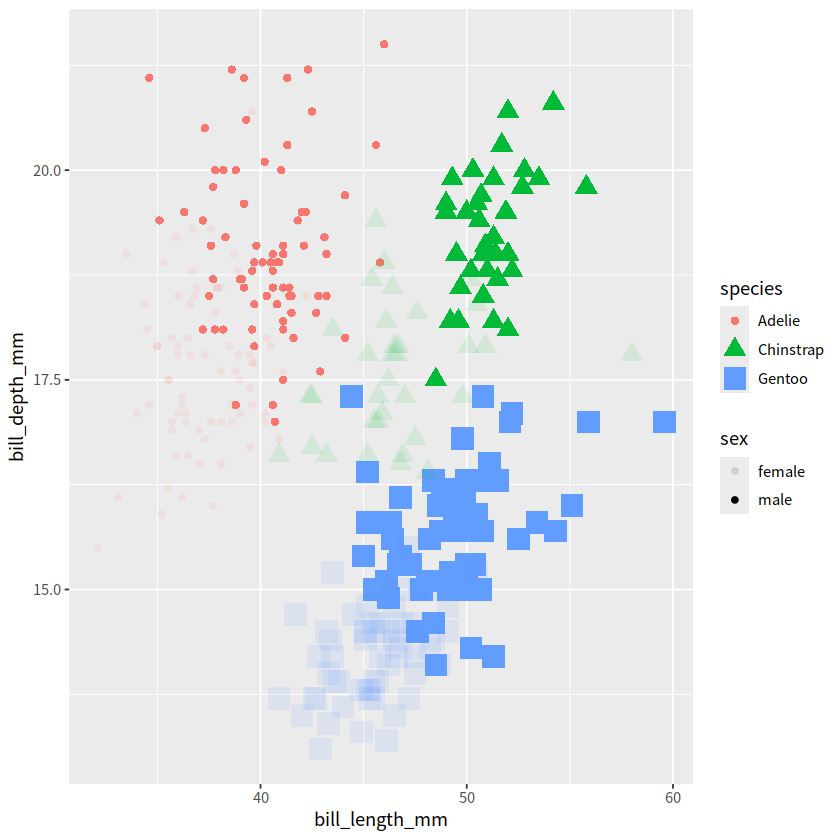

In [17]:
ggplot(data = penguins)+
  geom_point(aes(x = bill_length_mm, y = bill_depth_mm,
                 size=species, color=species,
                shape=species, alpha=sex))

- ![image.png](image/a-3new.png)
- `ggplot()` 初始化绘图，相当于打开了一张纸，准备画画。

- `ggplot(data = penguins)` 表示使用`penguins`这个数据框来画图。

- `+`表示添加图层。

- `geom_point()`表示绘制散点图。

- `aes()`表示数值和视觉属性之间的映射。
- `aes()`除了位置上映射，还可以实现**色彩(`color`)、形状(`size`)或透明度(`alpha`)**等视觉属性的映射。

`aes(x = bill_length_mm, y = bill_depth_mm)`，意思是变量`bill_length_mm`作为（映射为）`x`轴方向的位置，变量`bill_depth_mm`作为（映射为）`y`轴方向的位置。

- `ggplot()`内部有一套默认的设置
- ![image.png](image/a-14.png)

### 2 映射 vs 设置
- 想把图中的点指定为某一种颜色，可以使用设置语句，比如

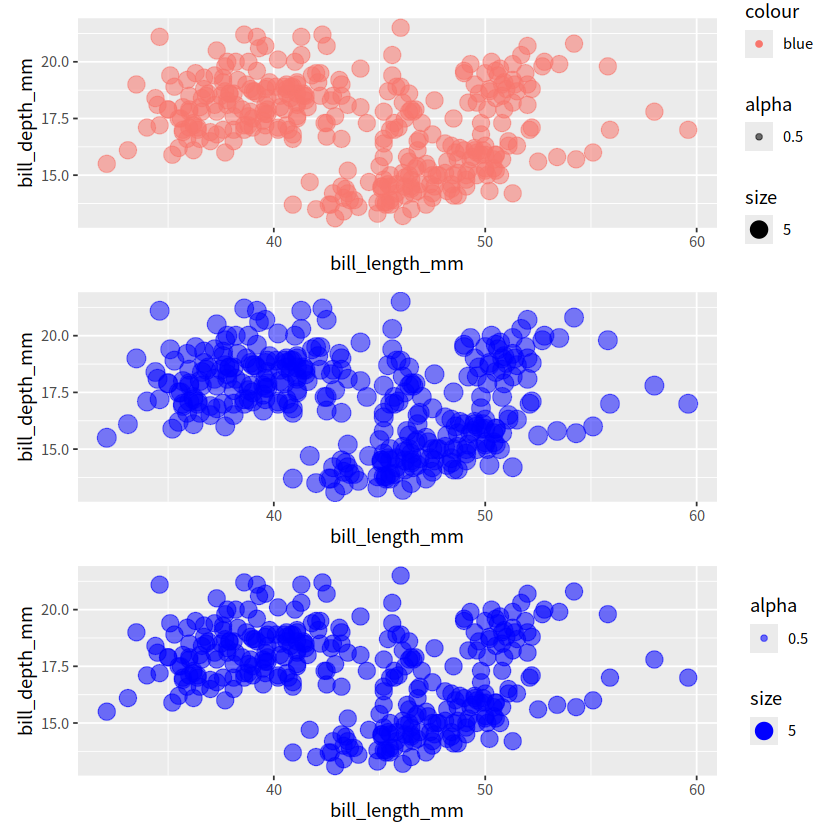

In [25]:
## 映射只是将你提供的元素映射进图片中，
## 而设置则会按照想要的方式设置某些元素
p1 = ggplot(penguins)+
  geom_point(aes(x = bill_length_mm, y = bill_depth_mm,
                 color = "blue", size=5, alpha=0.5) 
             )

p2 = ggplot(penguins)+
  geom_point(aes(x = bill_length_mm, y = bill_depth_mm), 
             color = "blue", size=5, alpha=0.5)

p1 / p2 / ggplot(penguins)+
             geom_point(aes(x = bill_length_mm, y = bill_depth_mm,
                        color = "blue", size=5, alpha=0.5), 
                        color="blue")
## 所以p1中只是将"blue"这个元素映射入图片的color，表示只有一种类型的颜色
# 不会改变图片的颜色属性，这是我的个人理解

### 3 几何形状
- `geom_point()` 可以画散点图，也可以使用`geom_smooth()`绘制平滑曲线
- `geom_smooth()`有多个绘制平滑曲线的方法——线性拟合

`geom_smooth()` using formula = 'y ~ x'


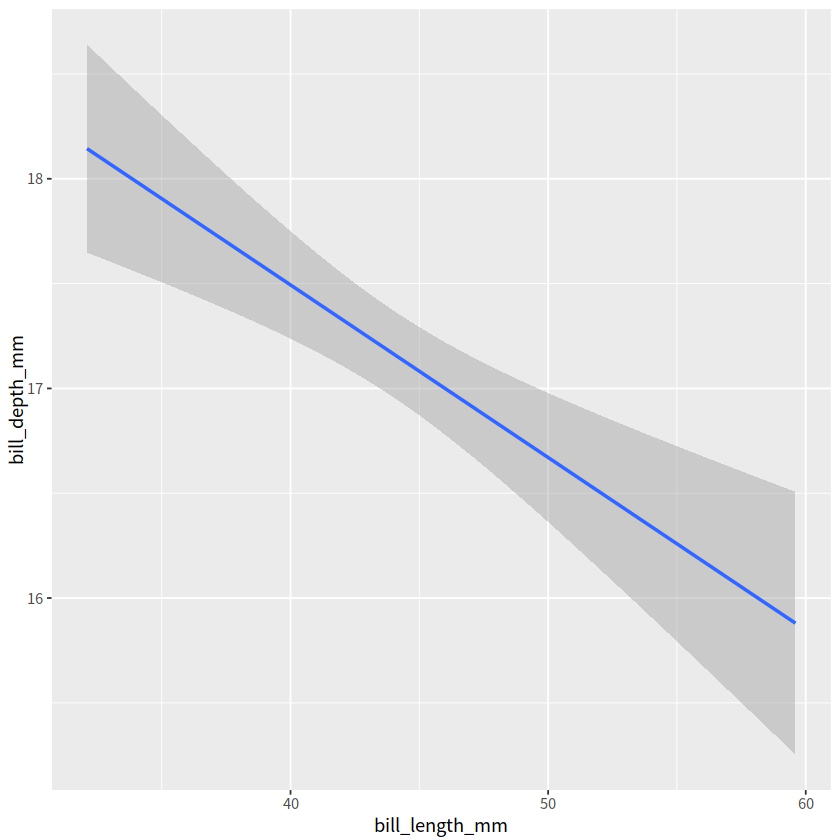

In [27]:
ggplot(penguins) +
  geom_smooth(aes(x = bill_length_mm, y = bill_depth_mm),
             method = "lm")

### 4 图层叠加

`geom_smooth()` using formula = 'y ~ x'


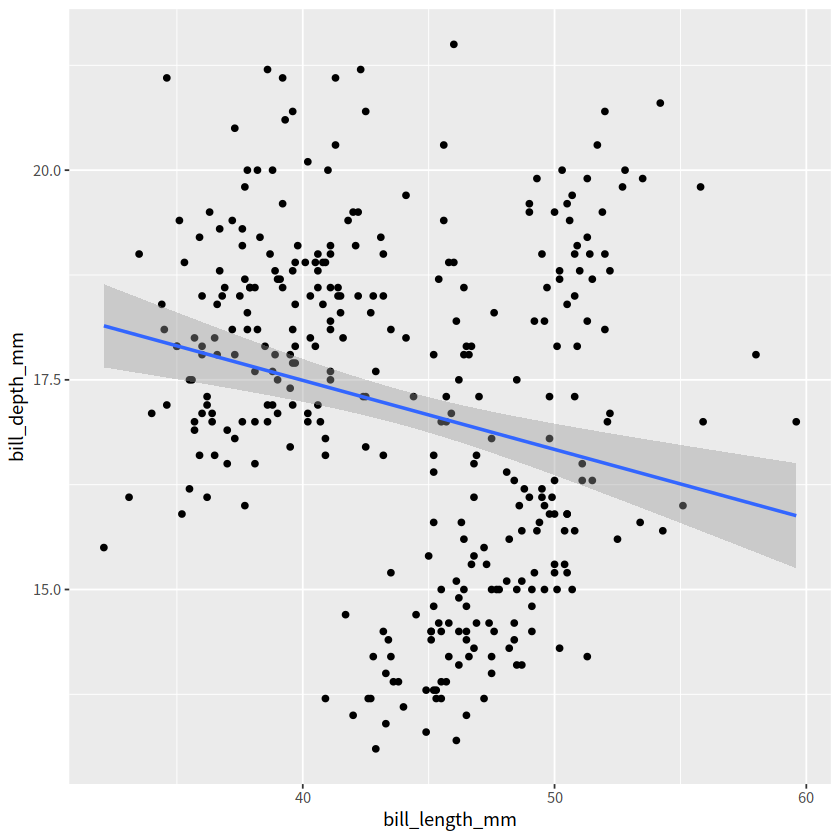

In [32]:
ggplot(penguins)+
  geom_point(aes(x = bill_length_mm, y = bill_depth_mm))+
  geom_smooth(aes(x = bill_length_mm, y = bill_depth_mm), method="lm")

`geom_smooth()` using formula = 'y ~ x'


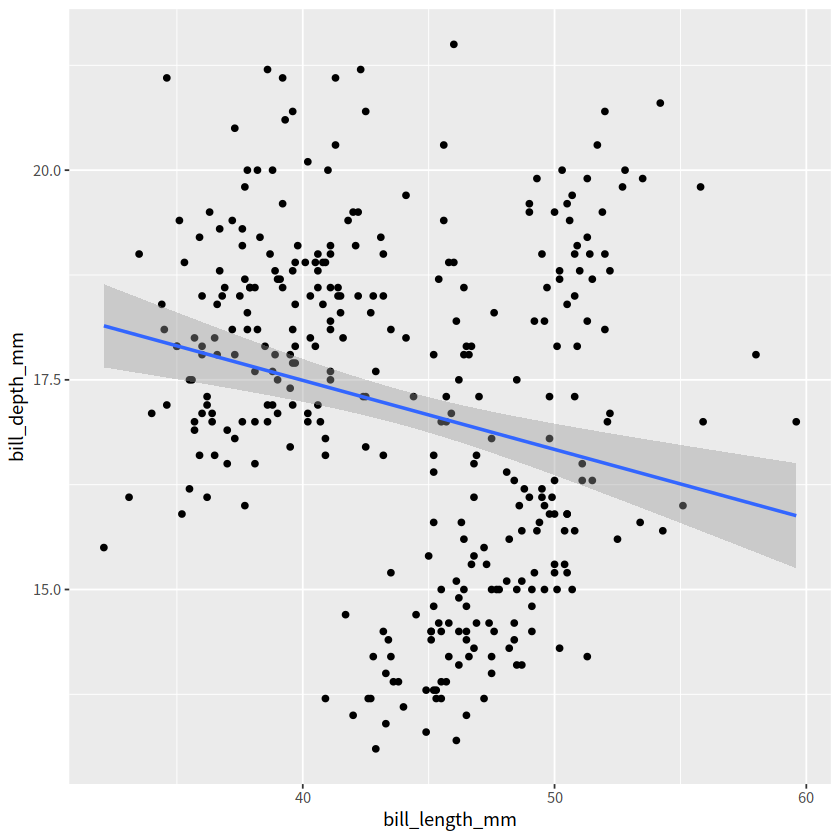

In [34]:
## 如果两图层使用的x y 相同，则可以直接将元素映射到底层(公用)ggplot()中
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm))+
  geom_point()+
  geom_smooth(method="lm")

### 5 Global vs Local
- 以下两段代码出来的图是一样。但背后的含义却不同。
- 映射关系`aes(x = bill_length_mm, y = bill_depth_mm)` 写在`ggplot()`里, 为**全局声明**(`Global`)。
  - 那么，当`geom_point()`画图时，发现缺少图形所需要的映射关系（点的位置、点的大小、点的颜色等等），就会从`ggplot()`全局变量中**继承映射关系**。
- 如果映射关系`aes(x = bill_length_mm, y = bill_depth_mm)`写在几何形状`geom_point()`里, 那么此处的映射关系就为**局部声明**(`Local`)
  - 那么`geom_point()`绘图时，发现所需要的映射关系已经存在，就不会继承全局变量的映射关系。

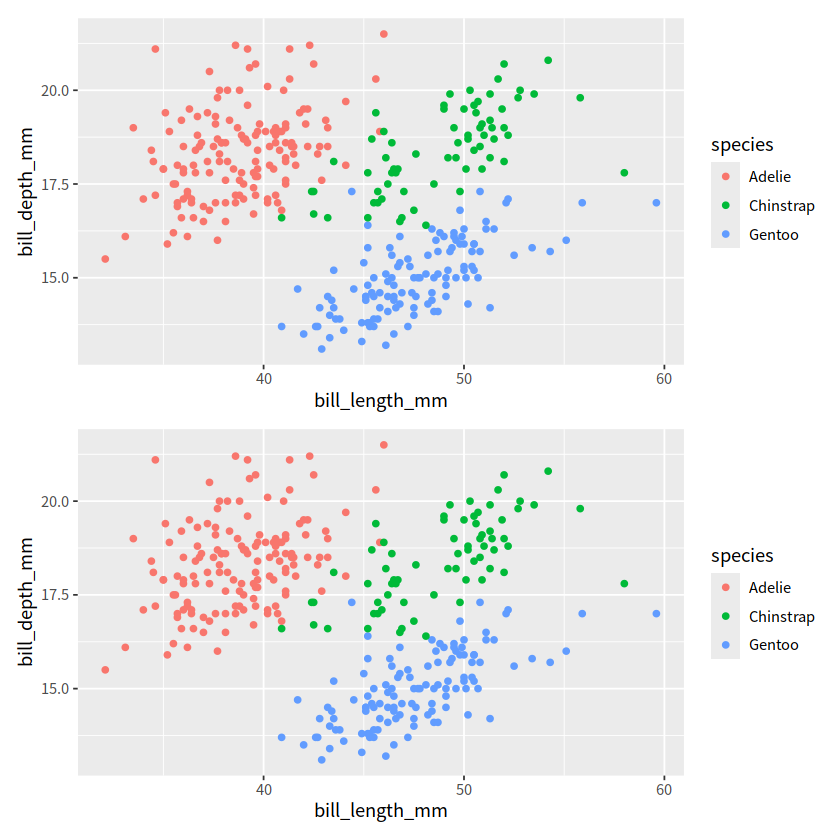

In [38]:
p1 = ggplot(penguins, aes(x=bill_length_mm, y=bill_depth_mm, 
                          color=species))+
       geom_point()

p2 = ggplot(penguins) +
       geom_point(aes(x = bill_length_mm, y = bill_depth_mm, 
                      color = species))
p1/p2

`geom_smooth()` using formula = 'y ~ x'


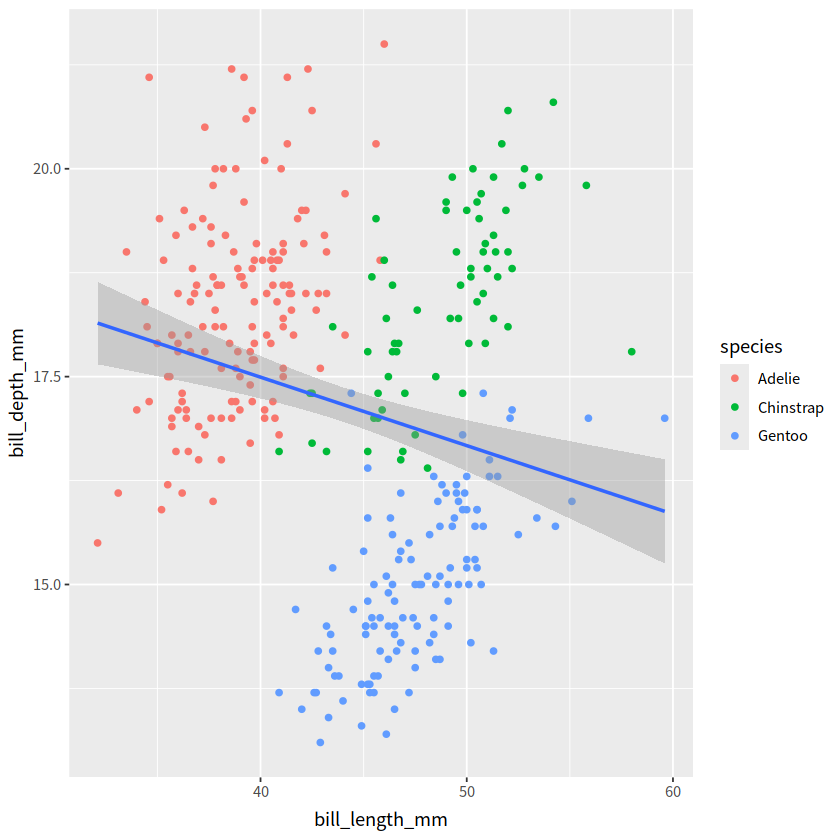

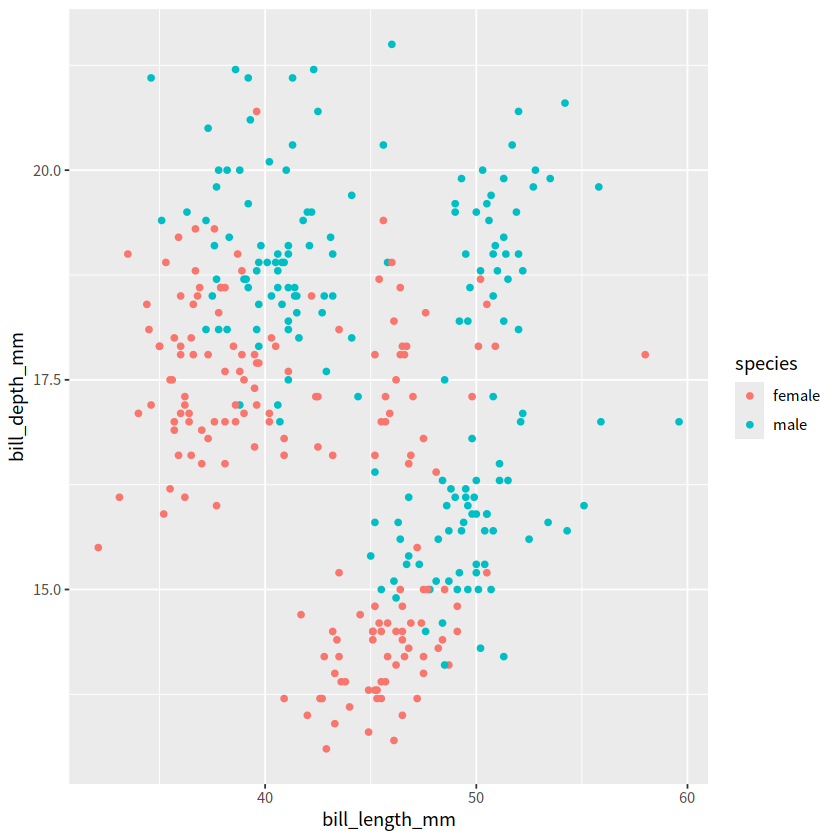

In [40]:
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm))+
  geom_point(aes(color=species))+
  geom_smooth(method="lm")
# 这里的 geom_point() 和 geom_smooth() 都会从全局变量中继承位置映射关系

ggplot(penguins,aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
  geom_point(aes(color = sex))
# 局部变量中的映射关系aes(color=)已经存在，因此不会从全局变量中继承
# 沿用当前的映射关系

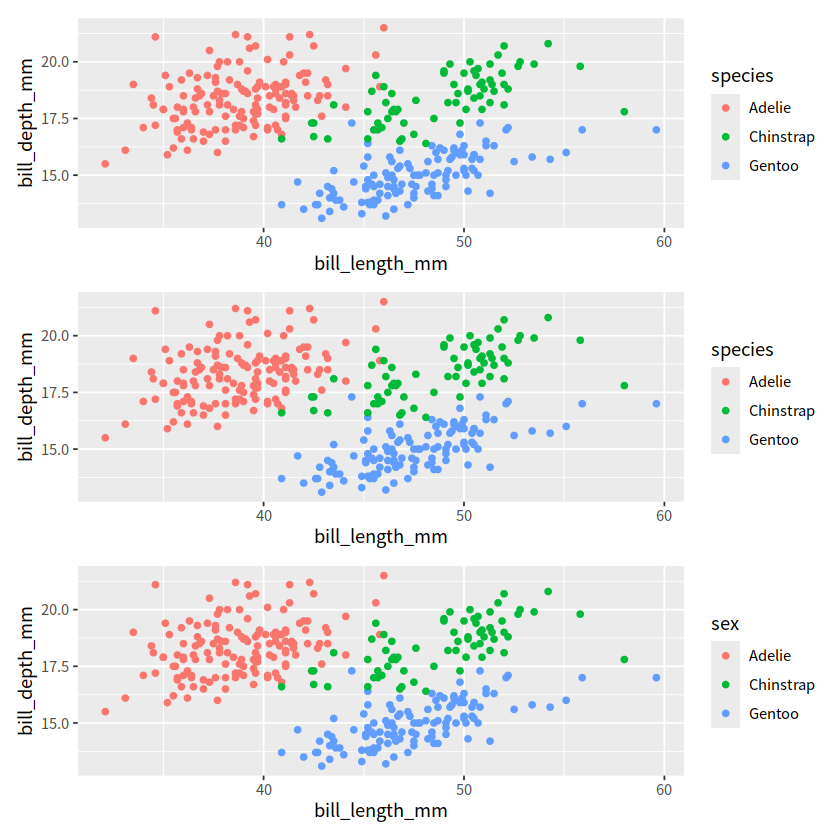

In [41]:
### 图层从全局声明中继承
# 当当前local单独声明时，图例标题还是会继承全局声明，而图例内容则沿用当前
p1 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
      geom_point()

p2 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
      geom_point(aes(color = species))

p3 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = sex)) +
      geom_point(aes(color = species))
# p3图例的标题继承了全局声明中的color
p1/p2/p3

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


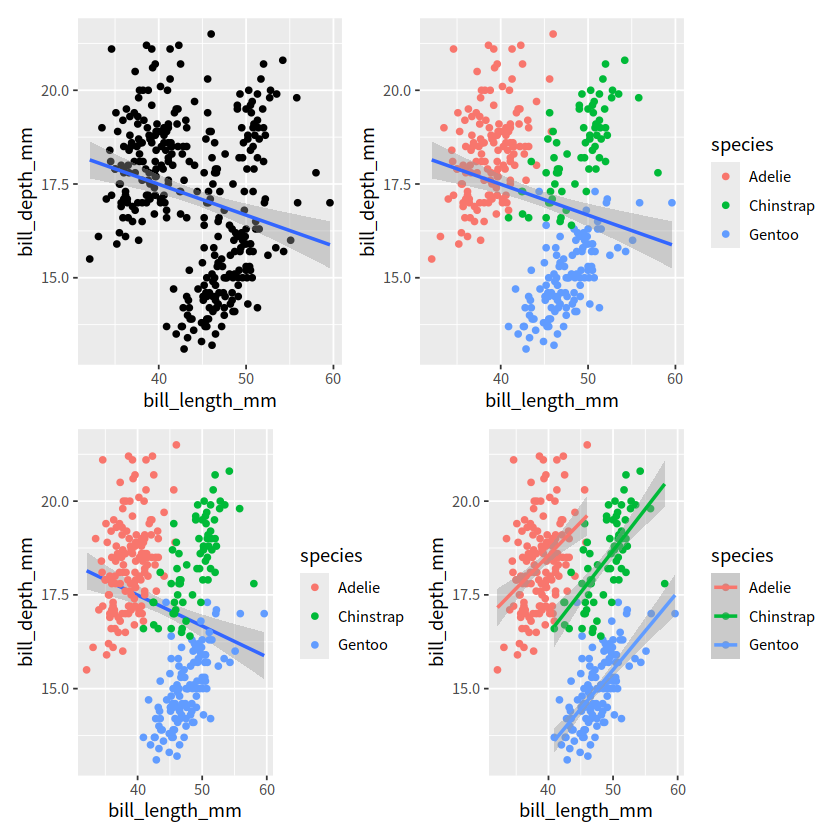

In [50]:
### 图层之间没有继承关系
p1 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
       geom_point() +
       geom_smooth(method = "lm")


p2 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
       geom_point(aes(color = species)) +
       geom_smooth(method = "lm")

p3 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
       geom_smooth(method = "lm") +
       geom_point(aes(color = species))

p4 = ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
       geom_point() +
       geom_smooth(method = "lm") 

(p1 + p2) / (p3 + p4)

`geom_smooth()` using formula = 'y ~ x'


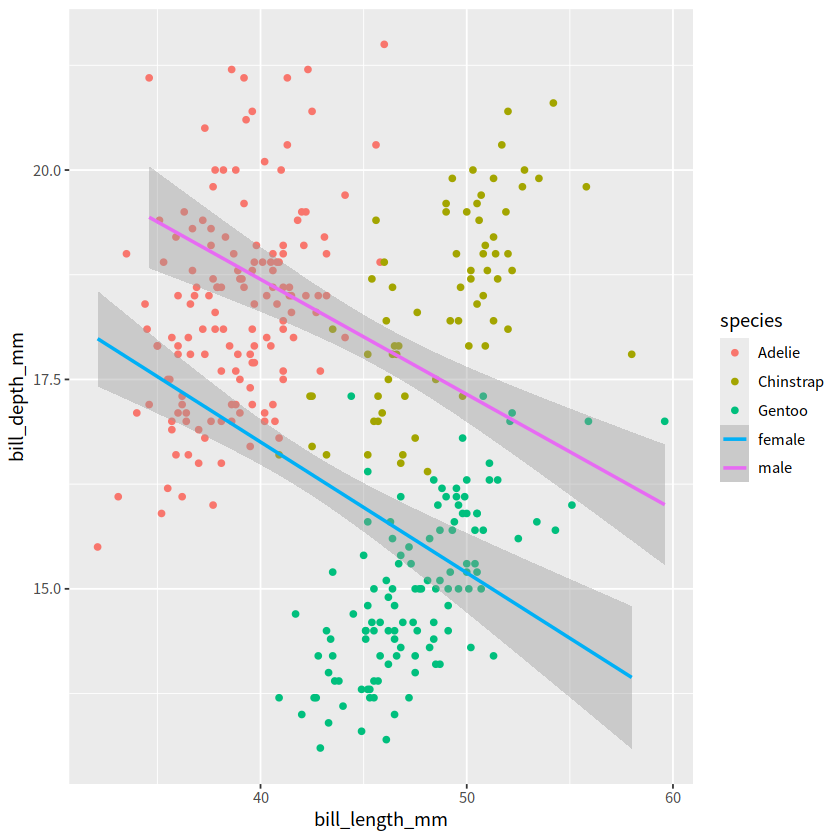

In [51]:
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
  geom_point() +
  geom_smooth(method = "lm", aes(color = sex)) 

### 6 保存图片
- `ggsave()`函数，将图片保存为所需要的格式，如”`.pdf`”, “`.png`”等， 还可以指定图片的高度和宽度，默认`units`是英寸，也可以使用”`cm`”, or “`mm`”.
- 如果想保存当前图形，`ggplot()`可以不用赋值，同时省略`ggsave()`中的 `plot = p1`，`ggsave()`会自动保存最近一次的绘图

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


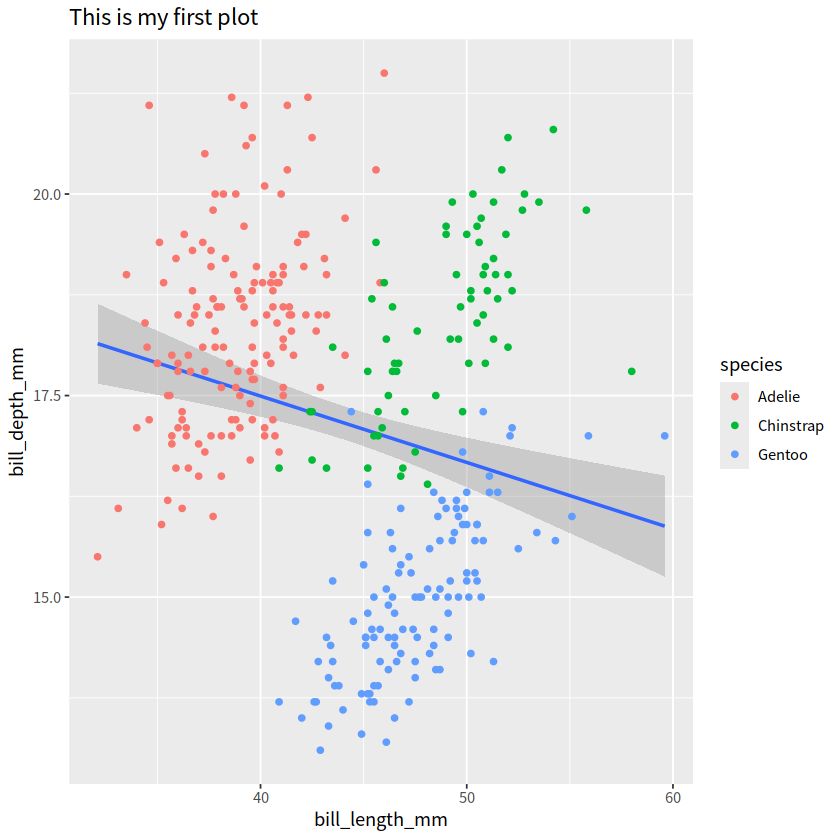

In [53]:
p1 <- penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm)) +
  geom_smooth(method = lm) +
  geom_point(aes(color = species)) +
  ggtitle("This is my first plot")
p1

ggsave(plot=p1, filename="my_plot.pdf", width=8, height=5, dpi=330)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


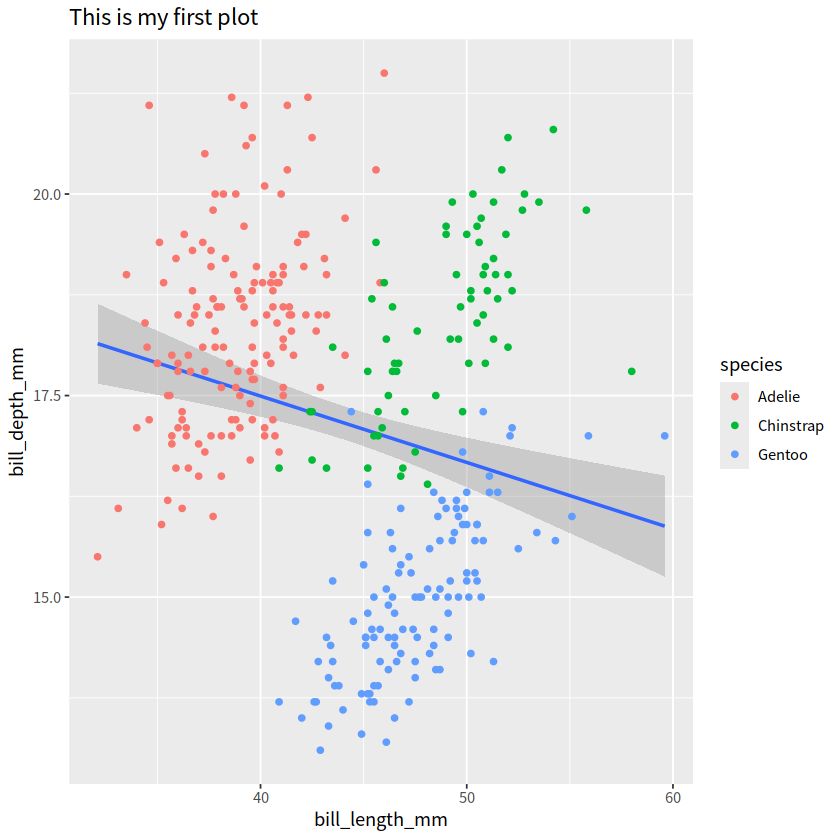

In [54]:
penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm)) +
  geom_smooth(method = lm) +
  geom_point(aes(color = species)) +
  ggtitle("This is my first plot")

ggsave("my_last_plot.pdf", width = 8, height = 6, dpi = 330)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


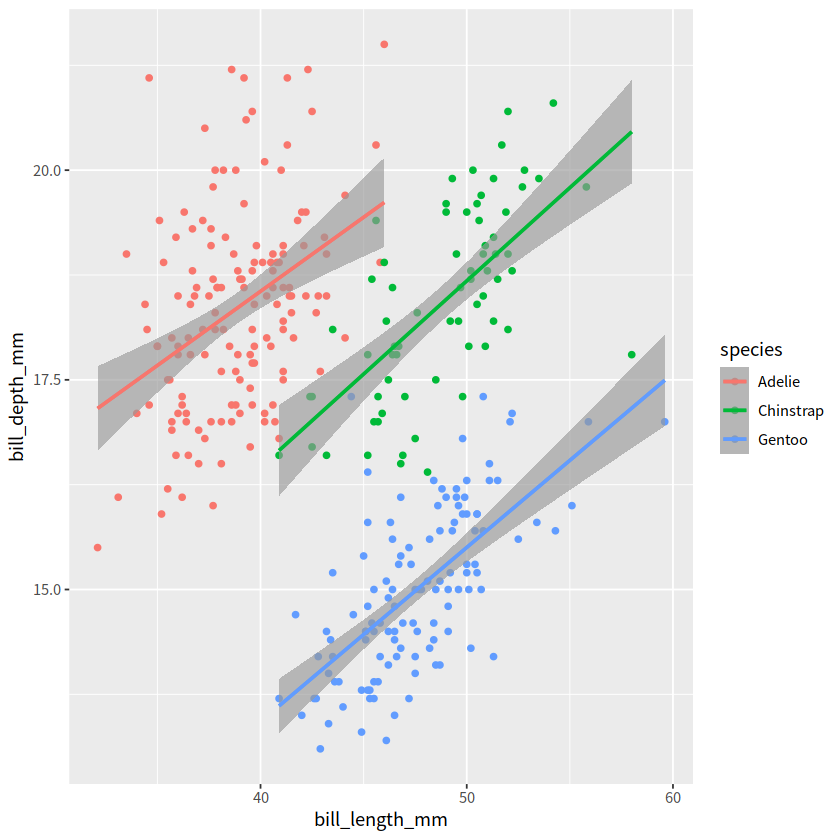

In [56]:
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color=species)) +
  geom_point() +
  geom_smooth(method="lm") +
  geom_smooth(aes(color=species), method="lm") 